### Student Information
Name:李緯倫

Student ID:109062109

GitHub ID:waylon620

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

# Part One: Take home exercises

In [26]:
import pandas as pd
import data_mining_helpers as dmh
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories,
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X["category"] = twenty_train.target
X["category_name"] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

#### Exercise 2:

In [27]:
X.iloc[::10, 0]

0       From: sd345@city.ac.uk (Michael Collier) Subje...
10      From: anasaz!karl@anasazi.com (Karl Dussik) Su...
20      From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...
30      From: vgwlu@dunsell.calgary.chevron.com (greg ...
40      From: david-s@hsr.no (David A. Sjoen) Subject:...
                              ...                        
2210    From: edimg@willard.atl.ga.us (Ed pimentel) Su...
2220    From: idr@rigel.cs.pdx.edu (Ian D Romanick) Su...
2230    From: news@cbnewsk.att.com Subject: Re: Bible ...
2240    From: balick@nynexst.com (Daphne Balick) Subje...
2250    From: ingles@engin.umich.edu (Ray Ingles) Subj...
Name: text, Length: 226, dtype: object

#### Exercise 5:

In [28]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df


,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [29]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [30]:
# Answer here
# why the isnull() did not work is that for "Nan" "None" and "" , isnull() will not take it as null
for item in NA_dict:
    if 'missing_example' in item:
        value = item['missing_example']
        if isinstance(value, str) and (value.lower() == 'nan' or value.lower() == 'none'):
            item['missing_example'] = np.nan
        elif value is None or value == '':
            item['missing_example'] = np.nan

NA_df = pd.DataFrame(NA_dict)

# Now, you can check for null values
missing_data = NA_df['missing_example'].isnull()
print(missing_data)

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool


#### Exercise 6:

In [31]:
# Answer here
# the size of the data, the order of the data, and the distribution of categories

#### Exercise 8:

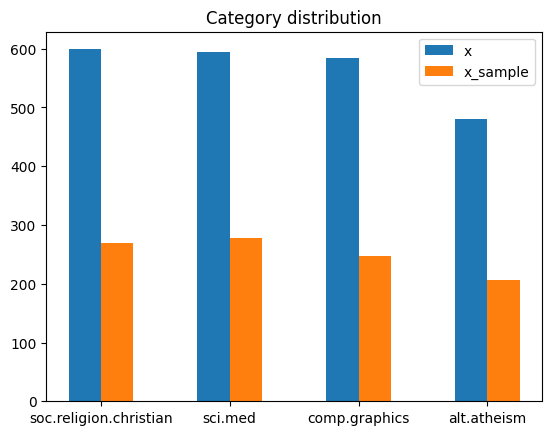

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64
sci.med                   277
soc.religion.christian    270
comp.graphics             247
alt.atheism               206
Name: category_name, dtype: int64


In [32]:
# Answer here
import numpy as np
import matplotlib.pyplot as plt
X_sample = X.sample(n=1000,random_state=42) #random state

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
bar_width = 0.25
fig, ax = plt.subplots()
x = np.arange(len(X.category_name.value_counts()))

sample_order = X_sample.category_name.value_counts()

bar1 = ax.bar(x - bar_width/2, X.category_name.value_counts(), bar_width, label='x')
bar2 = ax.bar(x + bar_width/2, [sample_order[1],sample_order[0],sample_order[2],sample_order[3]], bar_width, label='x_sample')

# Add labels, title, and legend
ax.set_title('Category distribution')
ax.set_xticks([0 ,1, 2, 3])
ax.set_xticklabels(X.category_name.value_counts().index)
ax.legend()

# Show the plot
plt.show()
print(X.category_name.value_counts())
print(X_sample.category_name.value_counts())

#### Exercise 10:

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

# Answer here
cnt = 0
for i in X_counts[4, 0:100].toarray()[0]:
  if i!= 0:
    print(count_vect.get_feature_names_out()[cnt])
  cnt+=1

00
01


#### Exercise 11:

35788
['term_21', 'term_10', 'term_17', 'term_115300', 'term_02', 'term_1989', 'term_12', 'term_115288', 'term_081052', 'term_1st', 'term_11', 'term_28', 'term_14', 'term_01', 'term_16', 'term_1ql06qinn2kf', 'term_18', 'term_about', 'term_30', 'term_05', 'term_american', 'term_1949', 'term_20', 'term_3794', 'term_134802', 'term_24', 'term_013657', 'term_addresses', 'term_19', 'term_1013']
['doc_1866', 'doc_1304', 'doc_1656', 'doc_1060', 'doc_68', 'doc_1231', 'doc_230', 'doc_1868', 'doc_1813', 'doc_872', 'doc_1705', 'doc_152', 'doc_1540', 'doc_168', 'doc_2057', 'doc_1518', 'doc_642', 'doc_1843', 'doc_1977', 'doc_831', 'doc_1740', 'doc_1331', 'doc_47', 'doc_589', 'doc_28', 'doc_298', 'doc_1455', 'doc_1912', 'doc_2064', 'doc_1824']
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

'remark\nI shuffle the data and get the first 30 terms\nI go through all the docs to find if it has the term inside, so i can guarantee that the elements are at least 1 on the diagonal.\n'

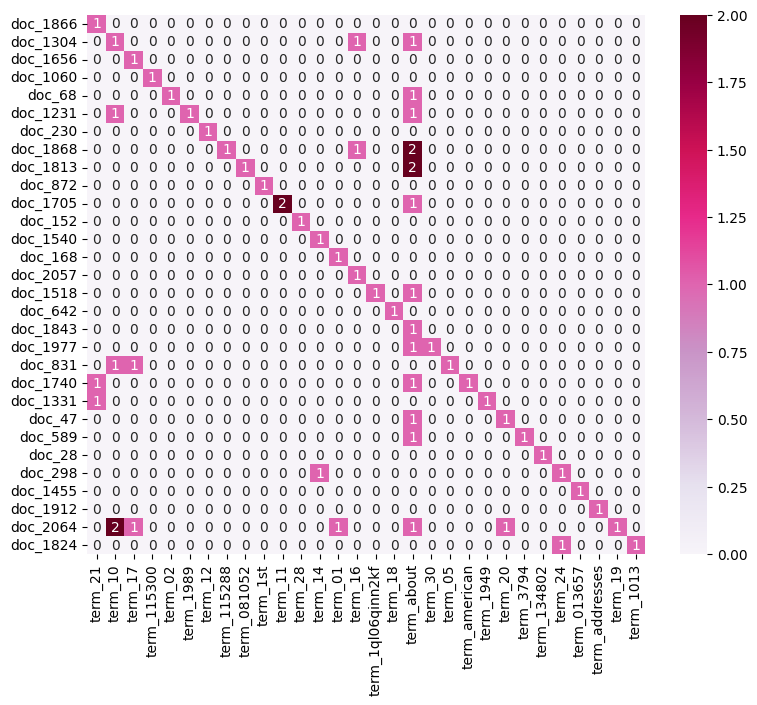

In [34]:
# Answer here
# print(count_vect.get_feature_names_out().shape)
# print(X_counts[0].shape)
# print(type(X_counts),type(X.text.index),type(X))
shuffled_indices = np.arange(100)
np.random.seed(10)
np.random.shuffle(shuffled_indices)
shuffle_doc = np.arange(len(X.text.index))
np.random.shuffle(shuffle_doc)
shuffled_X_counts = X_counts[shuffled_indices]
print(shuffled_X_counts[0].shape[1])
# print(shuffle_doc)
shuffled_feature_names = count_vect.get_feature_names_out()[shuffled_indices]
cnt = 0
t = []
tt = []
val = []
for _ in range(30):
    row = [0] * 30  # Create a row with 10 zeros
    val.append(row)
for i in range(30):
  for j in range(shuffled_X_counts[0].shape[1]):
    if shuffled_X_counts[i,j]!=0:
      flag = 1
      for _ in t:
        if count_vect.get_feature_names_out()[j] == _ :
          flag = 0
          break
      if flag :
        t.append(count_vect.get_feature_names_out()[j])
        tt.append(j)
        break
for i in range(30):
  cnt = 0
  for j in tt:
    val[i][cnt] = X_counts[shuffled_indices[i],j]
    cnt+=1
# first thirty features only
plot_x = ["term_"+str(i) for i in t[:30]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in shuffle_doc[:30]]
print(plot_y)
plot_z = val[:30][:30] #X_counts[how many documents, how many terms]
# print(val[:30][:30])
print(plot_z)
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
# display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

'''remark
I shuffle the data and get the first 30 terms
I go through all the docs to find if it has the term inside, so i can guarantee that the elements are at least 1 on the diagonal.
'''

#### Exercise 12:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


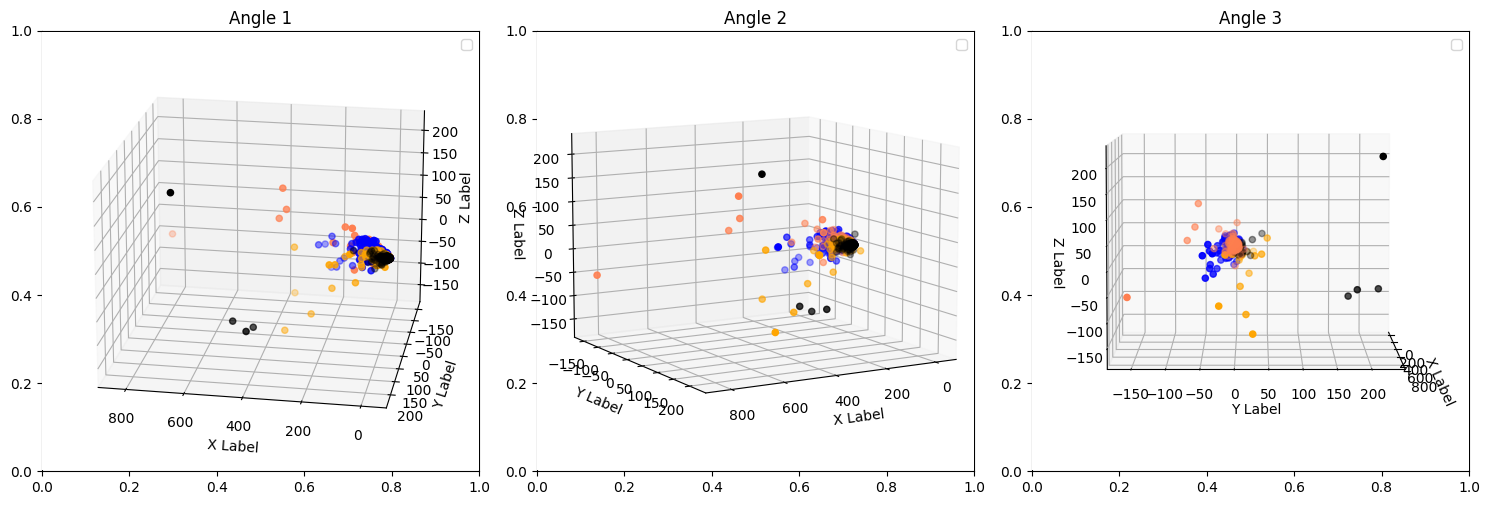

'\n I find out that black dots are separate from others. And the blue dots are relatively condensed.\n'

In [35]:
# Answer here
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 

col = ['coral', 'blue', 'black', 'orange']
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Set different camera angles for each subplot
view_angles = [(20, 100), (10, 60), (5, 00)] 

for i, ax in enumerate(axs):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.set_title(f'Angle {i + 1}')

    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]

        ax.scatter(xs, ys, zs, c=c, marker='o')

    # Set labels and legend
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend()

    # Set the camera angle
    ax.view_init(elev=view_angles[i][0], azim=view_angles[i][1])

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

'''
 I find out that black dots are separate from others. And the blue dots are relatively condensed.
'''

#### Exercise 13:

In [36]:
# Answer here
import plotly.express as px
term_frequencies = []
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]


x_data = count_vect.get_feature_names_out()[:300]
y_data = term_frequencies[:300]

fig = px.bar(x=x_data, y=y_data, text=y_data, labels={'x': 'Terms', 'y': 'Frequencies'})

fig.update_xaxes(tickangle=90)
fig.update_layout(width=1000, height=400)
fig.show()


#### Exercise 14:

In [37]:
# Answer here
term=[]
freq=[]

for i , j in zip(count_vect.get_feature_names_out(),term_frequencies):
    if j>1000:
        term.append(i)
        freq.append(j)
   
fig = px.bar(x=term,y=freq)

# showing the plot
fig.show()

#### Exercise 15:

In [38]:
# Answer here
sort_data=sorted(list(zip(freq,term)),reverse=True)

freq, term = zip(*sort_data)


fig = px.bar(x=term,y=freq)

# showing the plot
fig.show()


#### Exercise 16:

In [39]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)


# Answer here
mlb.fit(X.category_name)

X['bin_category'] = mlb.transform(X['category_name']).tolist()

print(X[0:9])

''' Yes, because it can fit in the same category if the category_name is same '''

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name  bin_category  
0           comp.graphics  [0, 1, 0, 0]  
1           comp.graphics  [0, 1, 0, 0]  
2  soc.religion.christian  [0, 0, 0, 1]  
3  soc.religion.christian  [0, 0, 0, 1]  
4  soc.religion.christian  [0, 0, 0, 1]  
5  soc.religion.christian  [0, 0, 0, 1]  
6  soc.religion.christian  [0, 0, 0, 1]  
7  

' Yes, because it can fit in the same category if the category_name is same '

# Part 2

In [40]:
import pandas as pd
from io import StringIO 

In [41]:
import pandas as pd
from io import StringIO

# pd.set_option('display.max_rows', 20)
# pd.set_option('display.max_columns', 20)

data = pd.DataFrame(columns=["sentence", "score"])

file_paths = [
    './sentiment+labelled+sentences/sentiment labelled sentences/amazon_cells_labelled.txt',
    './sentiment+labelled+sentences/sentiment labelled sentences/imdb_labelled.txt',
    './sentiment+labelled+sentences/sentiment labelled sentences/yelp_labelled.txt'
]

for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Split each line using '\t' to separate "sentence" and "score"
            parts = line.strip().split('\t')
            if len(parts) == 2:
                df = pd.DataFrame([parts], columns=["sentence", "score"])
                data = pd.concat([data, df], ignore_index=True)

data


,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


### exercise 1

In [42]:
for t in data["sentence"][:3]:
    print(t)

So there is no way for me to plug it in here in the US unless I go by a converter.
Good case, Excellent value.
Great for the jawbone.


### exercise 2

In [43]:
data.iloc[::10, 0]

0       So there is no way for me to plug it in here i...
10                        And the sound quality is great.
20      I went on Motorola's website and followed all ...
30      This is a simple little phone to use, but the ...
40      It has a great camera thats 2MP, and the pics ...
                              ...                        
2950           It wasn't busy at all and now we know why.
2960    Insults, profound deuchebaggery, and had to go...
2970    I immediately said I wanted to talk to the man...
2980    I have been to very few places to eat that und...
2990    The refried beans that came with my meal were ...
Name: sentence, Length: 300, dtype: object

### exercise 3

In [44]:
# show the top five of every 10 score == 1 data 
data.loc[(data['score'] == '1')][::10][:5]

,sentence,score
1,"Good case, Excellent value.",1
21,I bought this to use with my Kindle Fire and a...,1
44,Excellent bluetooth headset.,1
61,I really recommend this faceplates since it lo...,1
78,"I love this phone , It is very handy and has a...",1


### exercise 4

In [45]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)
data.isnull().apply(lambda x: check_missing_values(x),axis =1)



0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2995    (The amoung of missing records is: , 0)
2996    (The amoung of missing records is: , 0)
2997    (The amoung of missing records is: , 0)
2998    (The amoung of missing records is: , 0)
2999    (The amoung of missing records is: , 0)
Length: 3000, dtype: object

### exercise 5

In [46]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])

# Answer here
# why the isnull() did not work is that for "Nan" "None" and "" , isnull() will not take it as null
for item in NA_dict:
    if 'missing_example' in item:
        value = item['missing_example']
        if isinstance(value, str) and (value.lower() == 'nan' or value.lower() == 'none'):
            item['missing_example'] = np.nan
        elif value is None or value == '':
            item['missing_example'] = np.nan

NA_df = pd.DataFrame(NA_dict)

# Now, you can check for null values
missing_data = NA_df['missing_example'].isnull()
print(missing_data)

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool


### exercise 6

In [47]:
print(data.shape)
data_sample = data.sample(n=1000,random_state=42) #random state
display(data_sample)

(3000, 2)


,sentence,score
1801,Avoid at ALL costs!,0
1190,"Garbo, who showed right off the bat that her t...",1
1817,You will leave the theater wanting to go out a...,1
251,O my gosh the best phone I have ever had.,1
2505,I would not recommend this place.,0
...,...,...
618,You need two hands to operate the screen.This ...,0
406,It's so stupid to have to keep buying new char...,0
1157,I had to walk out of the theatre for a few min...,0
1068,This movie totally grates on my nerves.,0


In [48]:
df_sum_pos = 0
df_sum_neg = 0
for i in data['score']:
    if i=='1':
        df_sum_pos+=1
    else:
        df_sum_neg+=1        
print(df_sum_pos,df_sum_neg)

dfsample_sum_pos = 0
dfsample_sum_neg = 0
for i in data_sample['score']:
    if i=='1':
        dfsample_sum_pos+=1
    else:
        dfsample_sum_neg+=1        
print(dfsample_sum_pos,dfsample_sum_neg)

# the size of the data, the order of the data, and the distribution of categories are different

1500 1500
501 499


### exercise 7

In [49]:
# Answer here

print(max(data_sample.score.value_counts()))
upper_bound = max(data_sample.score.value_counts() + 50) #525 + 50
print(data_sample.score.value_counts())

501
1    501
0    499
Name: score, dtype: int64


### exercise 8

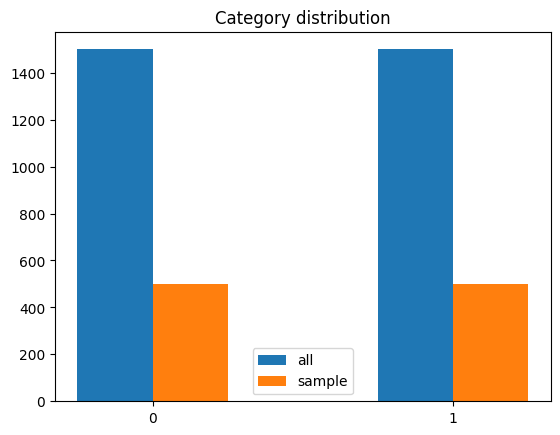

0    1500
1    1500
Name: score, dtype: int64
1    501
0    499
Name: score, dtype: int64


In [50]:
# Answer here
import matplotlib.pyplot as plt
import numpy as np

bar_width = 0.25
fig, ax = plt.subplots()
x = np.arange(len(data.score.value_counts()))

sample_order = data_sample.score.value_counts()

bar1 = ax.bar(x - bar_width/2, data.score.value_counts(), bar_width, label='all')
bar2 = ax.bar(x + bar_width/2, [sample_order[1],sample_order[0]], bar_width, label='sample')

ax.set_title('Category distribution')
ax.set_xticks([0 ,1])
ax.set_xticklabels(data.score.value_counts().index)
ax.legend()

# Show the plot
plt.show()
print(data.score.value_counts())
print(data_sample.score.value_counts())
#因為value_counts()會由大而小排，所以我在前面有做一次交換順序

### exercise 9

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_counts = count_vect.fit_transform(data.sentence) #learn the vocabulary and return document-term matrix
print(data_counts.shape)
print(data_counts[0])

(3000, 5155)
  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [52]:
count_vect.get_feature_names_out()[1887]


'frozen'

In [53]:
count_vect.get_feature_names_out()[4161]


'so'

In [54]:
analyze = count_vect.build_analyzer()
analyze(data.sentence[0])


['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'us',
 'unless',
 'go',
 'by',
 'converter']

In [55]:
data_counts.shape


(3000, 5155)

In [56]:
data_counts[0:10
            , 4150:4180].toarray()


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [57]:
count_vect.get_feature_names_out()[0:100]


array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17',
       '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973',
       '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005',
       '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30',
       '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44',
       '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb',
       '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85',
       '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned',
       'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad',
       'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse',
       'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable',
       'access', 'accessable', 'accessible', 'accessing', 'accessory',
       'accessoryone', 'accident', 'accidentally', 'acclaimed',
       'accolades', 'accommodations'], dtype=object)

### exercise 10

In [58]:
# Answer here
cnt = 4150
for i in data_counts[0, 4150:4180].toarray()[0]:
  if i!= 0:
    print(count_vect.get_feature_names_out()[cnt])
  cnt+=1


so


### exercise 11

5155


['term_clicks', 'term_all', 'term_audio', 'term_performance', 'term_activated', 'term_45', 'term_and', 'term_by', 'term_680', 'term_for', 'term_great', 'term_case', 'term_can', 'term_any', 'term_again', 'term_beautiful', 'term_worked', 'term_best', 'term_are', 'term_battery', 'term_as', 'term_doesn', 'term_enough', 'term_bluetooth', 'term_advertised', 'term_about', 'term_absolutely', 'term_cool', 'term_contacts', 'term_but']
['doc_860', 'doc_2900', 'doc_176', 'doc_2964', 'doc_2530', 'doc_1416', 'doc_1305', 'doc_1683', 'doc_410', 'doc_25', 'doc_101', 'doc_1124', 'doc_1837', 'doc_2149', 'doc_805', 'doc_857', 'doc_2168', 'doc_2856', 'doc_638', 'doc_2691', 'doc_1983', 'doc_2108', 'doc_2716', 'doc_814', 'doc_230', 'doc_2388', 'doc_2335', 'doc_2795', 'doc_145', 'doc_1817']
[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 

'remark\nI shuffle the data and get the first 30 terms\nI go through all the docs to find if it has the term inside, so i can guarantee that the elements are at least 1 on the diagonal.\n'

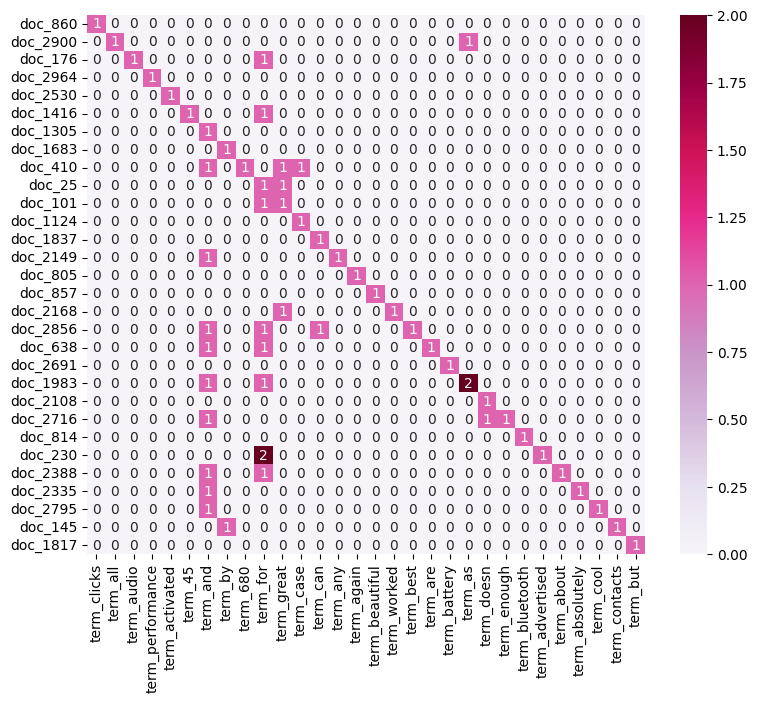

In [59]:
# Answer here

shuffled_indices = np.arange(100)
np.random.seed(10)
np.random.shuffle(shuffled_indices)
shuffle_doc = np.arange(len(data.sentence.index))
np.random.shuffle(shuffle_doc)
shuffled_data_counts = data_counts[shuffled_indices]
print(shuffled_data_counts[0].shape[1])

shuffled_feature_names = count_vect.get_feature_names_out()[shuffled_indices]
cnt = 0
t = []
tt = []
val = []

for _ in range(30):
    row = [0] * 30  # Create a row with 30 zeros
    val.append(row)
for i in range(30):
  for j in range(shuffled_data_counts[0].shape[1]):
    if shuffled_data_counts[i,j]!=0:
      flag = 1
      for _ in t:
        if count_vect.get_feature_names_out()[j] == _ :
          flag = 0
          break
      if flag :
        t.append(count_vect.get_feature_names_out()[j])
        tt.append(j)
        break
for i in range(30):
  cnt = 0
  for j in tt:
    val[i][cnt] = data_counts[shuffled_indices[i],j]
    cnt+=1
# first thirty features only
plot_x = ["term_"+str(i) for i in t[:30]]
print(plot_x)
plot_y = ["doc_"+ str(i) for i in shuffle_doc[:30]]
print(plot_y)
plot_z = val[:30][:30] #X_counts[how many documents, how many terms]
# print(val[:30][:30])
print(plot_z)

import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)

plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

'''remark
I shuffle the data and get the first 30 terms
I go through all the docs to find if it has the term inside, so i can guarantee that the elements are at least 1 on the diagonal.
'''

### exercise 12

In [60]:
# Answer here
categories = ['0','1']
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import the Axes3D module
col = [ 'blue', 'red']
X_reduced = PCA(n_components = 3).fit_transform(data_counts.toarray())
print(X_reduced.shape)


(3000, 3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


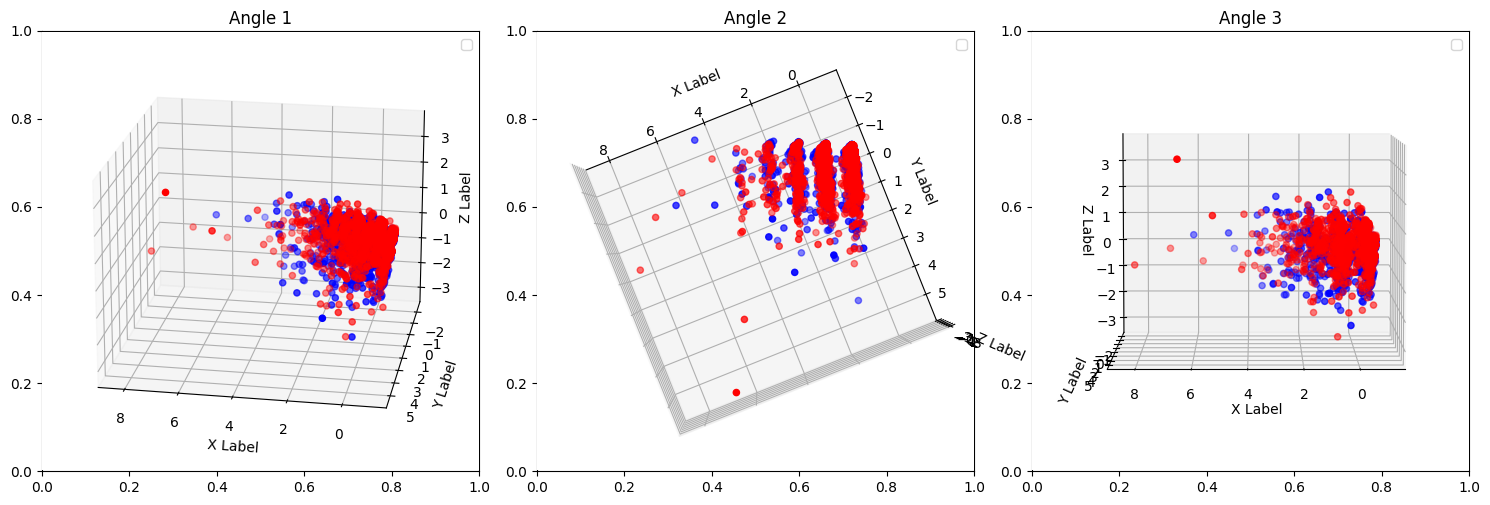

'\n I find out that most of the dots are in the same dstribution, only a few dots are seperates from others.\n Maybe the dots outside will be the important feature.\n In the second angle, i think that there is a special distribution for both red and blue dots.there are abvious spaces between the dots.\n'

In [61]:
# Create a figure with three subplots in a single row
fig, axs = plt.subplots(1, 3, figsize=(15, 5))


view_angles = [(20, 100), (90, 70), (5, 90)]  # (elev, azim) angles for each subplot

for i, ax in enumerate(axs):
    ax = fig.add_subplot(1, 3, i + 1, projection='3d')
    ax.set_title(f'Angle {i + 1}')

    for c, category in zip(col, categories):
        xs = X_reduced[data['score'] == category].T[0]
        ys = X_reduced[data['score'] == category].T[1]
        zs = X_reduced[data['score'] == category].T[2]

        ax.scatter(xs, ys, zs, c=c, marker='o')
        
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.legend()

    ax.view_init(elev=view_angles[i][0], azim=view_angles[i][1])

# Adjust layout and display the figure
plt.tight_layout()
plt.show()

'''
 I find out that most of the dots are in the same dstribution, only a few dots are seperates from others.
 Maybe the dots outside will be the important feature.
 In the second angle, i think that there is a special distribution for both red and blue dots.there are abvious spaces between the dots.
'''

### exercise 13

In [62]:
import plotly.express as px

x_data = count_vect.get_feature_names_out()[:300]
term_frequencies = np.asarray(data_counts.sum(axis=0))[0]
y_data = term_frequencies[:300]

fig = px.bar(x=x_data, y=y_data, text=y_data, labels={'x': 'Terms', 'y': 'Frequencies'})

fig.update_xaxes(tickangle=90)
fig.update_layout(width=1000, height=400)
fig.show()

### exercise 14

In [63]:
term=[]
freq=[]

for i , j in zip(count_vect.get_feature_names_out(),term_frequencies):
    if j>200:
        term.append(i)
        freq.append(j)
   
fig = px.bar(x=term,y=freq)

# showing the plot
fig.show()

### exercise 15

In [64]:
# Answer here
sort_data=sorted(list(zip(freq,term)),reverse=True)

freq, term = zip(*sort_data)


fig = px.bar(x=term,y=freq)

# showing the plot
fig.show()


### exercise 16

In [67]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(data.score)

data['bin_score'] = mlb.transform(data['score']).tolist()

print(data[0:9])

                                            sentence score bin_score
0  So there is no way for me to plug it in here i...     0       [0]
1                        Good case, Excellent value.     1       [1]
2                             Great for the jawbone.     1       [1]
3  Tied to charger for conversations lasting more...     0       [0]
4                                  The mic is great.     1       [1]
5  I have to jiggle the plug to get it to line up...     0       [0]
6  If you have several dozen or several hundred c...     0       [0]
7        If you are Razr owner...you must have this!     1       [1]
8                Needless to say, I wasted my money.     0       [0]


# Part 3

### new data visualizations

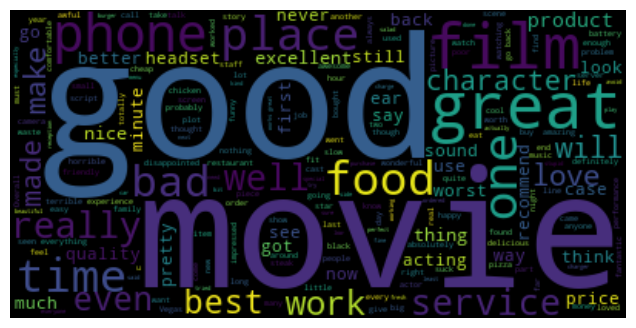

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

### 在測試之下發現wordcloud會自動過濾掉stop words，所以不需要對stop words做處理

text_data = " ".join(data['sentence'])

wordcloud = WordCloud().generate(text_data)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


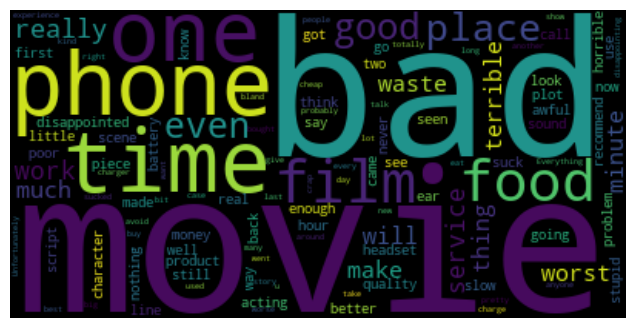

In [93]:
text_data = " ".join(data[data['score'] == '0']['sentence'])
# print(text_data)

wordcloud = WordCloud().generate(text_data)

plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


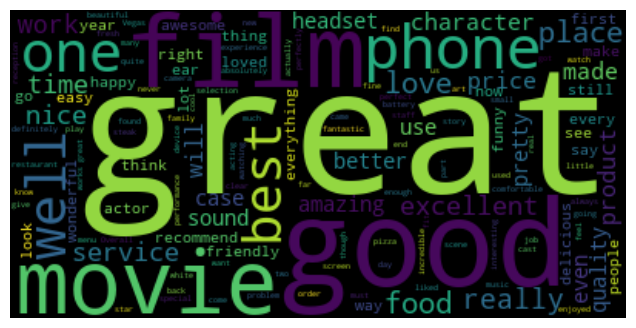

In [94]:
text_data = " ".join(data[data['score'] == '1']['sentence'])

# print(text_data)
wordcloud = WordCloud().generate(text_data)


plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### 可以發現在正面的文本中充滿正面的詞彙，像是good、great等
#### 而負面的文本中則有bad，但是卻也出現movie這個詞，推測和資料來源出處和電影相關有關係

### TF-IDF

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
### 透過TfidfVectorizer()實作出TF-IDF的matrix
analyze = count_vect.build_analyzer()
# analyze(data.sentence[0])
token = analyze("".join(list(data[:len(data)].sentence)))
# print(len(token))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data.sentence)
print(tfidf_matrix.toarray())
feature_names = tfidf_vectorizer.get_feature_names_out()
print(feature_names)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
['00' '10' '100' ... 'zillion' 'zombie' 'zombiez']


In [96]:
print(tfidf_matrix)

  (0, 1013)	0.3982952688733835
  (0, 647)	0.22339534467811012
  (0, 1982)	0.23151202391135026
  (0, 4793)	0.33187908783248754
  (0, 4835)	0.27541073174789316
  (0, 4531)	0.08671624087955355
  (0, 2158)	0.22277715355242936
  (0, 2314)	0.2956111707754561
  (0, 2432)	0.11981679118086065
  (0, 3387)	0.30861882226834114
  (0, 4609)	0.1274893309301928
  (0, 2809)	0.22865092628677175
  (0, 1829)	0.15620766310867332
  (0, 4987)	0.24912940464591313
  (0, 3043)	0.22339534467811012
  (0, 2427)	0.12068394874592439
  (0, 4545)	0.20763211346881053
  (0, 4161)	0.18746612963796125
  (1, 4861)	0.6340416987777308
  (1, 1603)	0.47072204948062
  (1, 713)	0.513063291919973
  (1, 1993)	0.3364192842689825
  (2, 2449)	0.8233779731740677
  (2, 2023)	0.3996123298170515
  (2, 4531)	0.1955703921972776
  :	:
  (2999, 1387)	0.2933113788886697
  (2999, 5110)	0.2933113788886697
  (2999, 3437)	0.2933113788886697
  (2999, 3857)	0.2688563788371658
  (2999, 2068)	0.27900612090340604
  (2999, 588)	0.2444013787856619
  (29

### Naive Bayes Classifier

In [97]:
print(data.score.tolist())

['0', '1', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0', '0', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '0', '0', '0', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0', '0', '1', '1', '0', '0', '1', '1', '0', '0', '0',

In [98]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(data.sentence, data.score, test_size=0.2, random_state=42)

# Create TF-IDF features on the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Train a Naive Bayes classifier on the TF-IDF features
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train.tolist())

X_test_tfidf = tfidf_vectorizer.transform(X_test)

y_pred = nb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test.tolist(), y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.8316666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       299
           1       0.84      0.81      0.83       301

    accuracy                           0.83       600
   macro avg       0.83      0.83      0.83       600
weighted avg       0.83      0.83      0.83       600



In [99]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(data.sentence, data.score, test_size=0.2, random_state=42)

# Create Count Vectorizer features on the training data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)

# Train a Naive Bayes classifier on the Count Vectorizer features
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_count, y_train.tolist())

X_test_count = count_vectorizer.transform(X_test)

y_pred = nb_classifier.predict(X_test_count)

accuracy = accuracy_score(y_test.tolist(), y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 0.835
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       299
           1       0.85      0.81      0.83       301

    accuracy                           0.83       600
   macro avg       0.84      0.84      0.83       600
weighted avg       0.84      0.83      0.83       600



In [100]:
#接著，我想把重複的資料刪除，再做一次測試

sum(data.duplicated())

data.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe

data.shape

(2966, 2)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data.sentence, data.score, test_size=0.2, random_state=42)

# Create TF-IDF features on the training data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Train a Naive Bayes classifier on the TF-IDF features
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train.tolist())

X_test_tfidf = tfidf_vectorizer.transform(X_test)

y_pred = nb_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test.tolist(), y_pred)
print("Accuracy:", accuracy)

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8249158249158249
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       288
           1       0.86      0.79      0.82       306

    accuracy                           0.82       594
   macro avg       0.83      0.83      0.82       594
weighted avg       0.83      0.82      0.82       594



In [102]:
X_train, X_test, y_train, y_test = train_test_split(data.sentence, data.score, test_size=0.2, random_state=42)

# Create Count Vectorizer features on the training data
count_vectorizer = CountVectorizer()
X_train_count = count_vectorizer.fit_transform(X_train)

# Train a Naive Bayes classifier on the Count Vectorizer features
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_count, y_train.tolist())

X_test_count = count_vectorizer.transform(X_test)

y_pred = nb_classifier.predict(X_test_count)

accuracy = accuracy_score(y_test.tolist(), y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.8114478114478114
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       288
           1       0.84      0.78      0.81       306

    accuracy                           0.81       594
   macro avg       0.81      0.81      0.81       594
weighted avg       0.81      0.81      0.81       594



##### 經過實作可以發現兩者在accuracy上的差異並不明顯，但是TFIDF在處理中和Count相比，多了IDF，也就是文字在文章中的代表性，在未處理重複資料的實驗下，TFIDF並沒有比較好的原因我認為是因為重複的資料讓TFIDF的判斷出代表性的效率下降，導致最後模型成果較低。
##### 而至於將重複的資料刪除後，TFIDF的正確率就相較Count來的更高，但是不管是Count、TFIDF的正確率都下降了，我認為是訓練的資料集變小了，導致正確率下降了一點點，但我認為此差距甚小可以忽略。

# Part 4
### What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets?

##### 我認為將三個不同網頁的資料合併一起訓練不是很好的選擇，因為可能對於不同網頁有他們獨特的資料，像是電影評論都是在imdb上，而在評論區的評論可能就會誤導模型，像是在文字雲中可以看到movie在負面評論中很常出現，這可能就會是不正確的資訊。
##### 我認為的inefficient part 是在PCA分析中，我們必須手動調整鏡頭的角度，我一開始沒有找到能明顯看出分布的角度，是經過慢慢地調整後才找到了比較好的角度，我認為這是比較麻煩的地方。